# Boost to the Future

# Part I: Data Exploration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temperature-change/FAOSTAT_data_en_11-1-2024.csv
/kaggle/input/temperature-change/FAOSTAT_data_11-24-2020.csv
/kaggle/input/temperature-change/FAOSTAT_data_1-10-2022.csv
/kaggle/input/temperature-change/Environment_Temperature_change_E_All_Data_NOFLAG.csv


In [2]:
import kagglehub
temperature_change_path = kagglehub.dataset_download('sevgisarac/temperature-change')

## Loading the data

In [3]:
# Data set informations

# read data sets
df = pd.read_csv("../input/temperature-change/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin-1') # csv file is encoding as latin-1 type
df_countrycode=pd.read_csv('../input/temperature-change/FAOSTAT_data_11-24-2020.csv') #this csv file includes ISO-3 Country Code, this mentioned in Data Wrangling 

#examine each column and find unique items of Months and Element columns
display(df.head(5))
print('\n')
#display(df.info())
display(df.describe())
print('\n')
print("Months")
display(df.Months.unique())
print('\n')
print("Elements")
display(df.Element.unique())
print('\n')
display(df_countrycode.head())

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000




Months


array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)



Elements


array(['Temperature change', 'Standard Deviation'], dtype=object)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN
2,284,Åland Islands,248.0,NaN,ALA,NaN,NaN
3,3,Albania,8.0,AL,ALB,NaN,NaN
4,4,Algeria,12.0,DZ,DZA,NaN,NaN


### Month codes are 7001 - 7012 for Jan - Dec, rest are aggregates

In [4]:
df[df['Months Code'] <= 7012].Months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

Find the country code for the US

In [5]:
display(df_countrycode[df_countrycode['Country'].str.contains('United States')].head(5))

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
297,232,United States Minor Outlying Islands,581.0,UM,UMI,NaN,NaN
298,231,United States of America,840.0,US,USA,NaN,NaN
299,240,United States Virgin Islands,850.0,VI,VIR,NaN,NaN


In [6]:
us_code = 231

### Get US data

In [7]:
us = df[df['Area Code']==us_code]
us = us[us['Months Code'].between(7001, 7012)]
us.rename(columns={'Area': 'Country'}, inplace=True)
display(us.head(5))
us.drop(['Months','Element Code','Element','Unit','Area Code'],axis=1,inplace=True)
us.keys()

,Area Code,Country,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
7888,231,United States of America,7001,January,7271,Temperature change,°C,0.943,-0.771,-1.170,...,0.512,0.616,1.548,2.060,1.913,2.033,2.675,2.128,1.600,1.866
7889,231,United States of America,7001,January,6078,Standard Deviation,°C,1.057,1.057,1.057,...,1.057,1.057,1.057,1.057,1.057,1.057,1.057,1.057,1.057,1.057
7890,231,United States of America,7002,February,7271,Temperature change,°C,1.215,1.425,0.577,...,-0.215,-0.048,2.438,0.662,-0.347,0.389,3.788,3.528,1.765,0.375
7891,231,United States of America,7002,February,6078,Standard Deviation,°C,1.336,1.336,1.336,...,1.336,1.336,1.336,1.336,1.336,1.336,1.336,1.336,1.336,1.336
7892,231,United States of America,7003,March,7271,Temperature change,°C,0.656,-1.082,1.400,...,1.211,1.251,3.688,0.162,0.220,2.532,3.778,1.844,1.632,1.404


Index(['Country', 'Months Code', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965',
       'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973',
       'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981',
       'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')

In [8]:
us = us.melt(id_vars=["Country","Months Code"], var_name="year", value_name="temp_change")
display(us.sample(5))

,Country,Months Code,year,temp_change
678,United States of America,7004,Y1989,1.390
73,United States of America,7001,Y1964,1.057
1095,United States of America,7008,Y2006,0.345
918,United States of America,7004,Y1999,0.366
394,United States of America,7006,Y1977,0.878


In [9]:
us["year"] = [i.split("Y")[-1] for i in us.year]
us.set_index('year', inplace=True)
us.loc[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]

,Country,Months Code,temp_change
year,,,
2010,United States of America,7001,0.512
2010,United States of America,7001,1.057
2010,United States of America,7002,-0.215
2010,United States of America,7002,1.336
2010,United States of America,7003,1.211
...,...,...,...
2019,United States of America,7010,0.767
2019,United States of America,7011,0.514
2019,United States of America,7011,0.840


## Let's aggragate the data
Group by year and take the mean of the tempurate changes<br>
Plot along with a trend line

In [10]:
import matplotlib.pyplot as plt

,year,temp_change
0,1961,0.302250
1,1962,0.451583
2,1963,0.514417
3,1964,0.227167
4,1965,0.295333


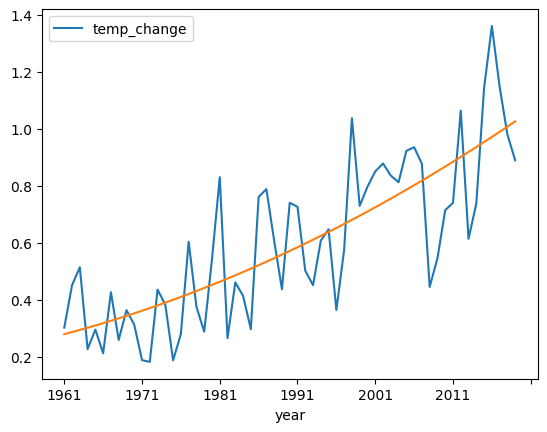

In [11]:
res = us.groupby('year').agg(
    {'temp_change': 'mean'}
).reset_index()
display(res.head(5))
res.plot(x='year', y='temp_change')
x = res['year'].to_numpy(np.int32)
trend = np.polyfit(x, res['temp_change'].to_numpy(), 2)

# plot the trend line
plt.plot(np.polyval(trend, x))
plt.show()

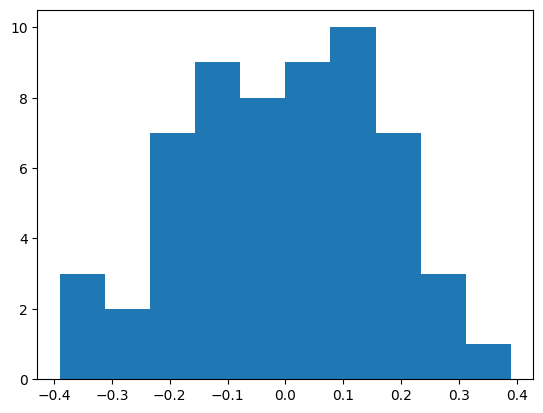

In [12]:
plt.hist(np.polyval(trend, x) - res['temp_change'].to_numpy())
plt.show()

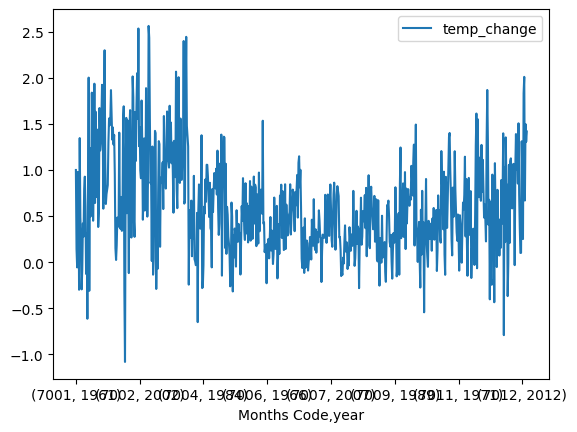

In [13]:
res = us.groupby(['Months Code', 'year']).agg({
    'temp_change': 'mean'
})

res.plot()
plt.show()

temp_change
year Months Code             
1961 7001              1.0000
     7002              1.2755
     7003              0.8825
     7004             -0.2430
     7005              0.0910

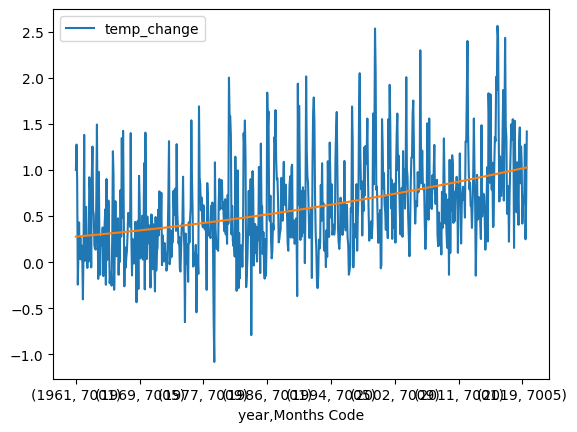

In [14]:
res = us.groupby(['year', 'Months Code']).agg({'temp_change': 'mean'})
display(res.head(5))
res.plot()
res.reset_index()
x = np.arange(res.shape[0])#res.to_numpy(np.int32)
trend = np.polyfit(x, res.to_numpy(), 2)

# plot the trend line
plt.plot(np.polyval(trend, x))
plt.show()

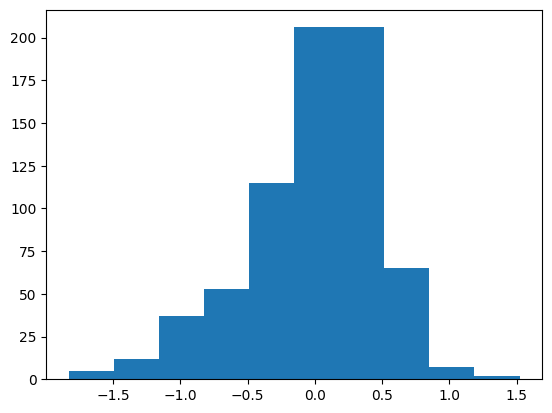

In [15]:
plt.hist(np.polyval(trend, x) - res['temp_change'].to_numpy())
plt.show()

### Exploring data
Checking for outliers by looking at deviation from a 3 month rolling mean

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


<Axes: xlabel='year'>

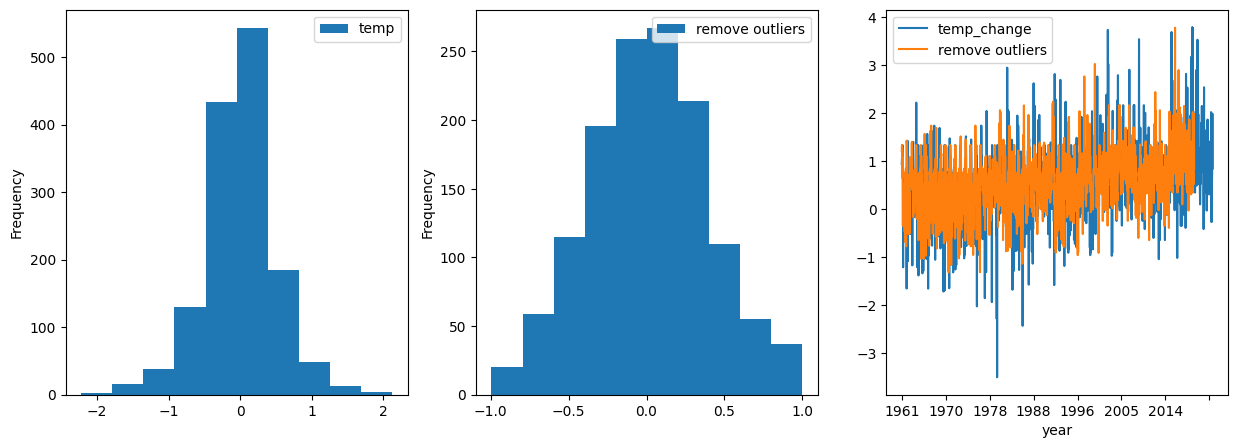

In [16]:
n = 3
rolling_mean = us['temp_change'].rolling(window=n).mean()

fig, ax = plt.subplots(1, 3, figsize=(15,5))
temp_roll = us['temp_change'] - rolling_mean
temp_roll.plot.hist(ax=ax[0], label='temp')
plt.sca(ax[0])
plt.legend()
temp_roll[np.abs(temp_roll) < 1].plot.hist(y='temp_change', ax=ax[1], label='remove outliers')
plt.sca(ax[1])
plt.legend()
us.plot(y='temp_change', ax=ax[2])
us[np.abs(temp_roll) < 1].plot(y='temp_change', ax=ax[2], label='remove outliers')

## Now let's look at the entire world

In [17]:
dy = df.copy()
dy.dropna(inplace=True)
dy.drop(dy[dy['Months'].str.contains(r'\x96')].index, inplace=True)
dy = dy[dy['Months Code'].between(7001, 7012)]
dy.rename(columns={'Area': 'Country'}, inplace=True)
#us.set_index('Months', inplace=True)
dy = dy.drop(['Months', 'Element Code','Element','Unit', 'Area Code'], axis=1)

dy = dy.melt(id_vars=["Months Code", "Country"], var_name="year", value_name="temp_change")
display(dy.head(5))

,Months Code,Country,year,temp_change
0,7001,Afghanistan,Y1961,0.777
1,7001,Afghanistan,Y1961,1.950
2,7002,Afghanistan,Y1961,-1.743
3,7002,Afghanistan,Y1961,2.597
4,7003,Afghanistan,Y1961,0.516


In [18]:
dy["year"] = [i.split("Y")[-1] for i in dy.year]
dy.set_index('year', inplace=True)

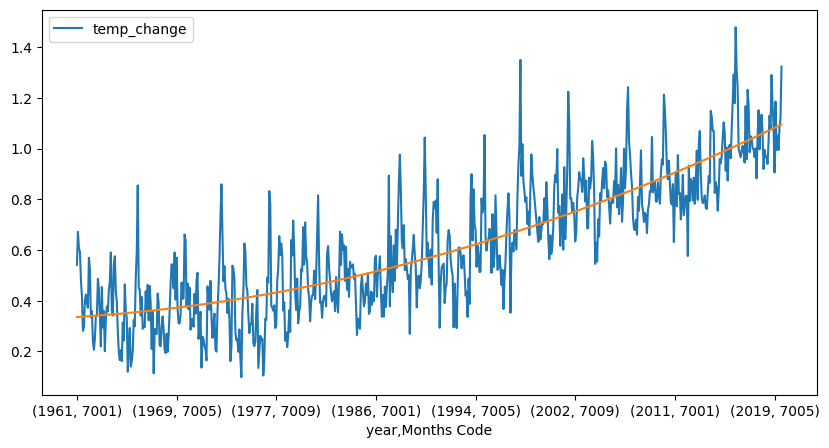

In [19]:
res = dy.groupby(['year', 'Months Code']).agg({
    'temp_change': 'mean'
})
res.reset_index()
res.plot(figsize=(10,5))
x = np.arange(res.shape[0])
trend = np.polyfit(x, res.to_numpy(), 2)

# plot the trend line
plt.plot(np.polyval(trend, x))
plt.show()

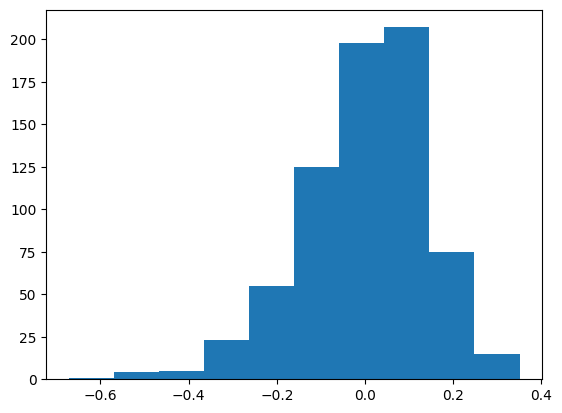

In [20]:
plt.hist(np.polyval(trend, x) - res['temp_change'].to_numpy())
plt.show()

<Axes: xlabel='year'>

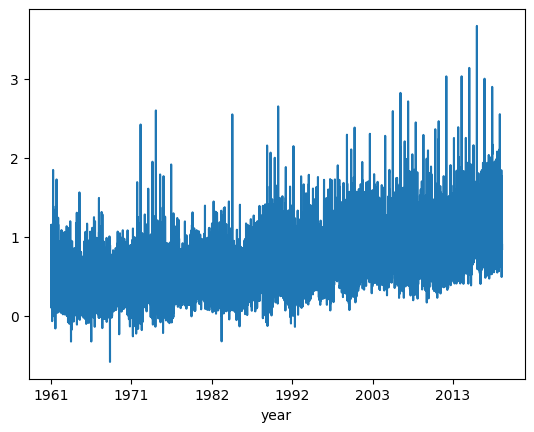

In [21]:
s = dy['temp_change'].rolling(window=30).mean()
s[~s.isna()].plot()

In [22]:
dy.groupby('Months Code').head()

,Months Code,Country,temp_change
year,,,
1961,7001,Afghanistan,0.777
1961,7001,Afghanistan,1.950
1961,7002,Afghanistan,-1.743
1961,7002,Afghanistan,2.597
1961,7003,Afghanistan,0.516
1961,7003,Afghanistan,1.512
1961,7004,Afghanistan,-1.709
1961,7004,Afghanistan,1.406
1961,7005,Afghanistan,1.412


In [23]:
dy.head()

,Months Code,Country,temp_change
year,,,
1961,7001,Afghanistan,0.777
1961,7001,Afghanistan,1.950
1961,7002,Afghanistan,-1.743
1961,7002,Afghanistan,2.597
1961,7003,Afghanistan,0.516


### Average by month

,Months Code,temp_change
0,7001,0.713457
1,7002,0.780807
2,7003,0.706392
3,7004,0.628869
4,7005,0.591600


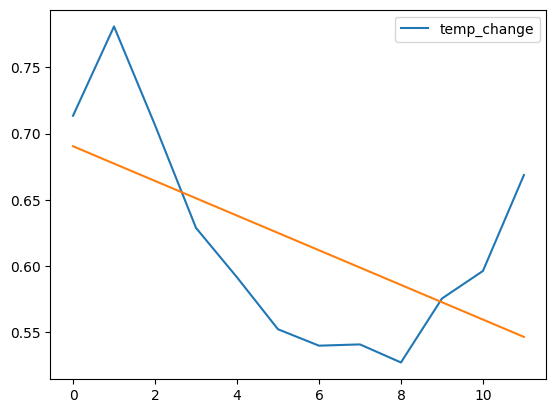

In [24]:
res = dy.groupby('Months Code').agg(
    {'temp_change': 'mean'}
).reset_index()
display(res.head(5))
res.plot(y='temp_change')
x = res['Months Code'].to_numpy(np.int32)
trend = np.polyfit(x, res['temp_change'].to_numpy(), 1)


# plot the trend line
trendline = np.polyval(trend, x)
plt.plot(trendline)
plt.show()

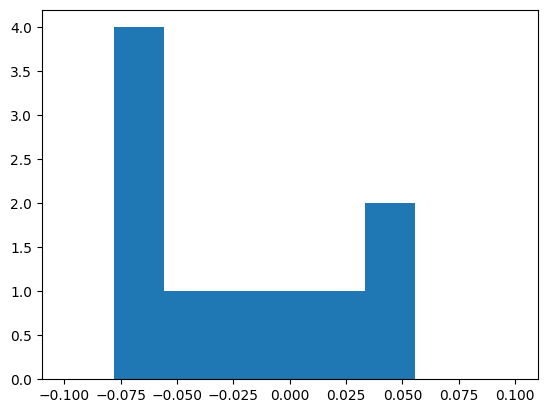

In [25]:
temp = res['temp_change'].to_numpy()

# plot residual
plt.hist(temp - trendline, bins=np.linspace(-.1, .1, 10))
plt.show()

# Part II: XGBoost

### Let's import XGBoost and some libraries from scikit-learn

In [26]:
import xgboost as xgb # XGBoost
from xgboost import plot_importance, plot_tree # Plotting functions
from sklearn.metrics import mean_squared_error # MSE

### Because this is time-series data we cannot use the normal scikit-learn train-test splitting

## US temperature by year

### Let's start with a simple sample. We'll select just the US data again, and aggregate it to get the mean temperature by year.

In [27]:
us = df[df['Area Code']==us_code].copy() # Make a copy so we don't overwrite the original
us = us[us['Months Code'].between(7001, 7012)]
temp_change_code = 7271 # remove temp std
us = us[us['Element Code'] == temp_change_code]
us = us.melt(id_vars=['Months Code'], var_name='year', value_name='temp') # Organize by year
us = us[us['year'].str.startswith('Y')] # Only keep actual years
us['year'] = [i.split('Y')[-1] for i in us.year]
us.head()

,Months Code,year,temp
72,7001,1961,0.943
73,7002,1961,1.215
74,7003,1961,0.656
75,7004,1961,-1.21
76,7005,1961,-0.348


In [28]:
# Geat mean value of each year
dyear = us.groupby('year').agg({
    'temp': 'mean'
}).reset_index()#.set_index('year', inplace=True)
dyear['year'] = dyear['year'].astype(int) # Cast the year strings as integers
dyear.set_index('year', inplace=True) # Set year as the index
dyear['temp'] = dyear['temp'].astype(float)
dyear.tail()

,temp
year,
2015,1.537333
2016,1.973917
2017,1.546000
2018,1.211833
2019,1.029750


Let's make sure everyting looks reasonable

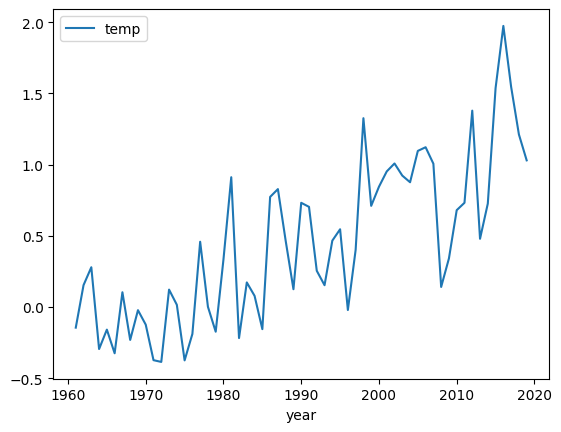

In [29]:
dyear.plot()
plt.show()

In [30]:
def train_test_split(df, year='01-01-2000'):
    return df[df.index < year].copy(), df[df.index >= year].copy()

def train_test_split(df, year=2000):
    return df[df.year < year].copy(), df[df.year >= year].copy()

Let's split the data into a train a test set (using the default year 2000) and plot them together

In [31]:
dyear['temp_prev'] = dyear['temp'].shift(-1)

In [32]:
dyear.dtypes

temp         float64
temp_prev    float64
dtype: object

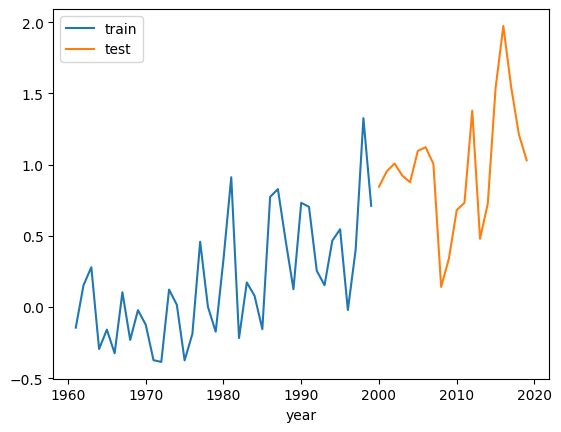

In [33]:
train, test = train_test_split(dyear, 2000)
train.rename(columns={'temp': 'train'}).merge(
    test.rename(
        columns={'temp': 'test'}
    ), on='year', how='outer'
    ).plot(y=['train', 'test'])
plt.show()

Now we'll build the features

In [34]:
def create_features(df, label=None):
    df['year'] = df.index
    X = df[['year', 'temp_prev']]
    if label is not None:
        y = df[label]
        return X, y
    return X

In [35]:
X_train, y_train = create_features(train, 'temp')
X_test, y_test = create_features(test, 'temp')

In [36]:
display(X_train.head())
display(y_train.head())

,year,temp_prev
year,,
1961,1961,0.153333
1962,1962,0.279000
1963,1963,-0.295500
1964,1964,-0.159167
1965,1965,-0.325333


year
1961   -0.145333
1962    0.153333
1963    0.279000
1964   -0.295500
1965   -0.159167
Name: temp, dtype: float64

In [37]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

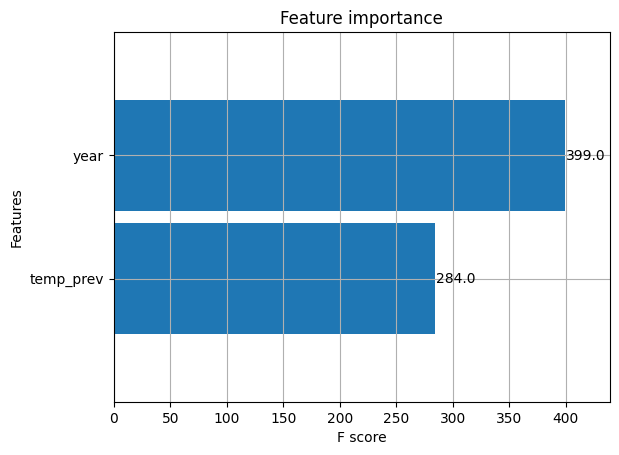

In [38]:
_ = plot_importance(reg, height=0.9)

In [39]:
y_train.describe()

count    39.000000
mean      0.177220
std       0.414778
min      -0.386000
25%      -0.157458
50%       0.121917
75%       0.461542
max       1.325833
Name: temp, dtype: float64

In [40]:
y_test.describe()

count    20.000000
mean      0.980146
std       0.428135
min       0.140667
25%       0.730250
50%       0.979042
75%       1.144396
max       1.973917
Name: temp, dtype: float64

<Axes: xlabel='year'>

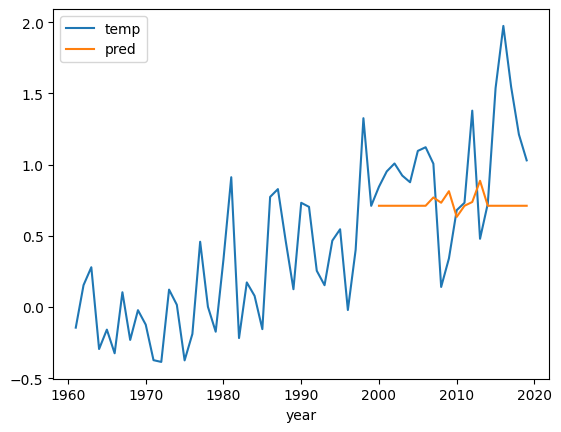

In [41]:
test['pred'] = reg.predict(X_test)
pd.concat([train, test], sort=False)[['temp', 'pred']].plot()

Cleary this can be imporved

In [42]:
def xgb_predict(X, y, val, n_estimators=100):
    reg = xgb.XGBRegressor(n_estimators=n_estimators)
    reg.fit(X, y)

    pred = reg.predict(val)
    return pred

In [43]:
def validate(data, window, n_tests, n_estimators=100):
    predictions = []
    history = []
    errors = []

    for i in range(len(data.values) - window - n_tests + 1):
        train_X, train_y = data.drop(columns='temp').iloc[i:i+window].values, data[['temp']].iloc[i:i+window].values#.iloc[:, -1:]
        test_X, test_y = data.drop(columns='temp').iloc[i+window:i+window+n_tests].values, data[['temp']].iloc[i+window:i+window+n_tests].values#.iloc[:, -1:]
        pred = xgb_predict(train_X, train_y, test_X, n_estimators=100)
        predictions.extend(pred)
        history.extend(test_y.reshape((1,-1))[0])
        err = mean_squared_error(history, predictions, squared=False)
        errors.append(err)

    err = mean_squared_error(history, predictions, squared=False)
    return err, errors, history, predictions

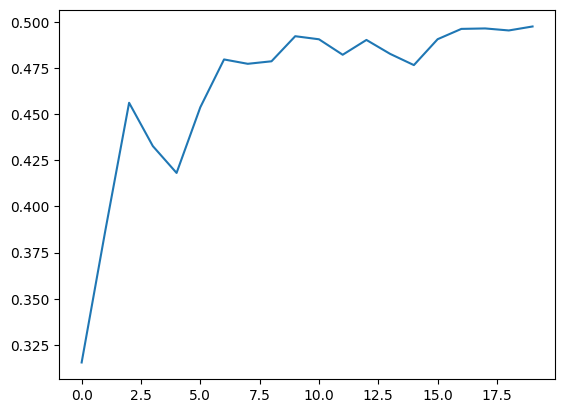

In [44]:
window=10
err, errs, test_Y, pred = validate(train, window=window, n_tests=10, n_estimators=1000)
plt.plot(errs)

Plot the response (prediction vs. truth)

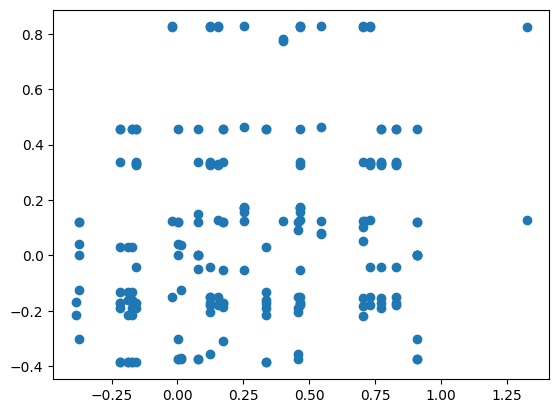

In [45]:
plt.plot(test_Y, pred, 'o')

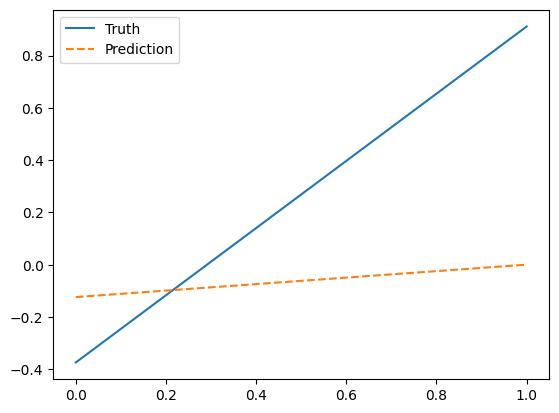

In [46]:
plt.plot(test_Y[::100], label='Truth')
plt.plot(pred[::100], ls='--', label='Prediction')
plt.legend()

Let's try to imporve this by using the months as well

## US temperature by month

### Data wrangling

In [47]:
us = df[df['Area Code']==us_code].copy() # Make a copy so we don't overwrite the original
us = us[us['Months Code'].between(7001, 7012)]
temp_change_code = 7271 # Temp change only, remove std
us = us[us['Element Code'] == temp_change_code]
us = us.dropna() # Remove bad entries
us = us.melt(id_vars=['Months Code'], var_name='year', value_name='temp') # Organize by year
us.rename(columns={'Months Code': 'Months'}, inplace=True)
us = us[us['year'].str.startswith('Y')] # Only keep actual years
us['year'] = [i.split('Y')[-1] for i in us.year]
us.reset_index()
us['Months'] = us['Months'].astype(int) % 7000
us['year'] = us['year'].astype(int)
us['temp'] = us['temp'].astype(float)
us.head()

,Months,year,temp
72,1,1961,0.943
73,2,1961,1.215
74,3,1961,0.656
75,4,1961,-1.210
76,5,1961,-0.348


<Axes: >

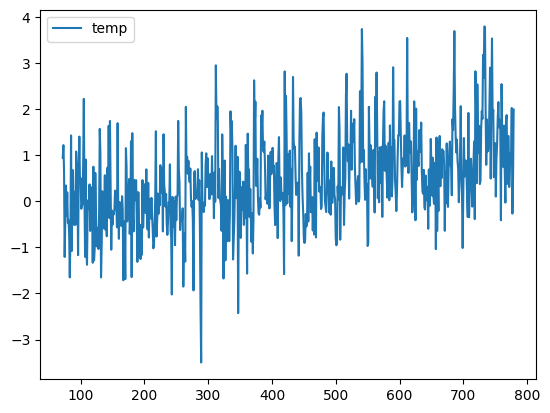

In [48]:
us.plot(y='temp')

### Feature definitions

In [49]:
n_prev = 10 # Found through trian and error

In [50]:
for i in range(n_prev):
    us[f'temp_prev{i}'] = us['temp'].shift(-1 * i)
us = us.dropna() # Remove NaN previous temps added at the end

In [51]:
def train_test_split(df, year='2000'):
    return df[df.year < year].copy(), df[df.year >= year].copy()

In [52]:
def create_features(df, label=None):
    prev = [f'temp_prev{i}' for i in range(n_prev)]
    X = df[['Months', 'year', *prev]]
    if label is not None:
        y = df[label]
        return X, y
    return X

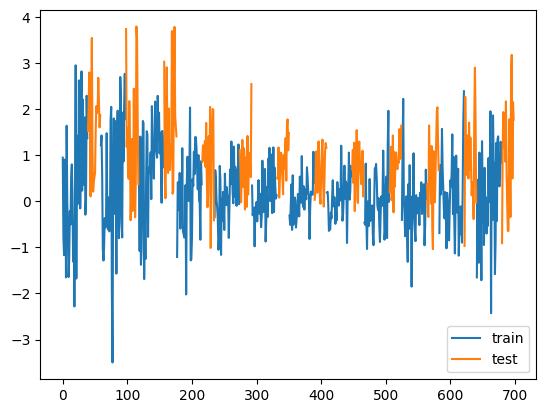

In [53]:
train, test = train_test_split(us, 2000)
train.rename(columns={'temp': 'train'}).merge(test.rename(columns={'temp': 'test'}), on=['Months', 'year'], how='outer').plot(y=['train','test'])
plt.show()

In [54]:
X_train, y_train = create_features(train, 'temp')
X_test, y_test = create_features(test, 'temp')

In [55]:
reg = xgb.XGBRegressor(n_estimators=100, early_stopping_rounds=50)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

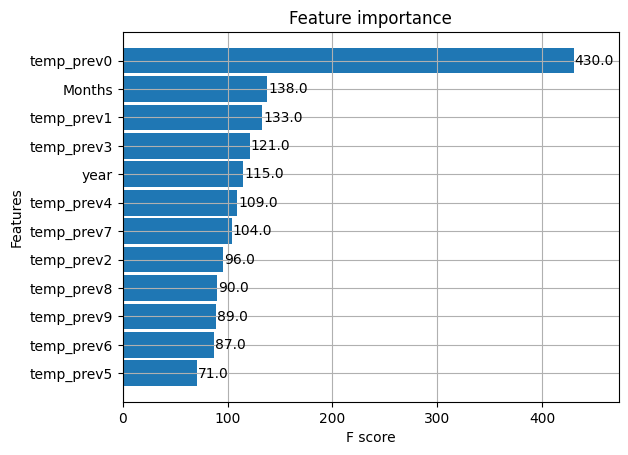

In [56]:
_ = plot_importance(reg, height=0.9)

The previous month's temperature change is the most important feature, but the month, year and other previous tempurate changes are still important

In [57]:
def xgb_predict(X, y, val, n_estimators=100):
    reg = xgb.XGBRegressor(n_estimators=n_estimators)#, early_stopping_rounds=50)
    reg.fit(X, y)
    pred = reg.predict(val)
    return pred

In [58]:
def validate(data, window, n_tests, n_estimators=100):
    predictions = []
    history = []
    errors = []

    for i in range(len(data.values) - window - n_tests + 1):
        train_X, train_y = data.drop(columns='temp').iloc[i:i+window].values, data[['temp']].iloc[i:i+window].values
        test_X, test_y = data.drop(columns='temp').iloc[i+window:i+window+n_tests].values, data[['temp']].iloc[i+window:i+window+n_tests].values
        pred = xgb_predict(train_X, train_y, test_X, n_estimators=n_estimators)
        predictions.extend(pred)
        history.extend(test_y.reshape((1,-1))[0])
        err = mean_squared_error(history, predictions, squared=False)
        errors.append(err)

    err = mean_squared_error(history, predictions, squared=False)
    return err, errors, history, predictions

In [59]:
err, errs, test_y, pred = validate(us, 
                                   window=90, 
                                   n_tests=10, 
                                   n_estimators=100)

In [60]:
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test_y, pred)), 3)}')

RMSE: 0.147


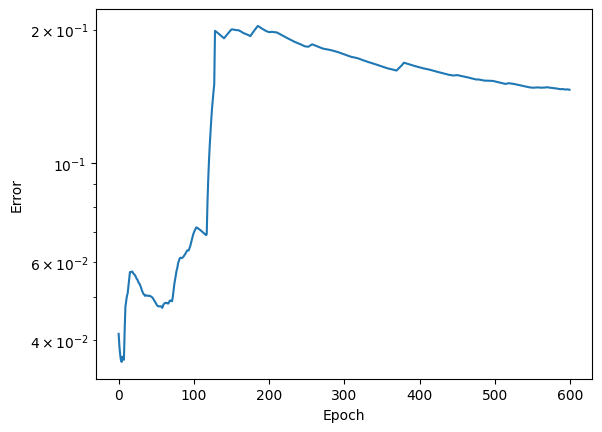

In [61]:
plt.plot(errs)
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

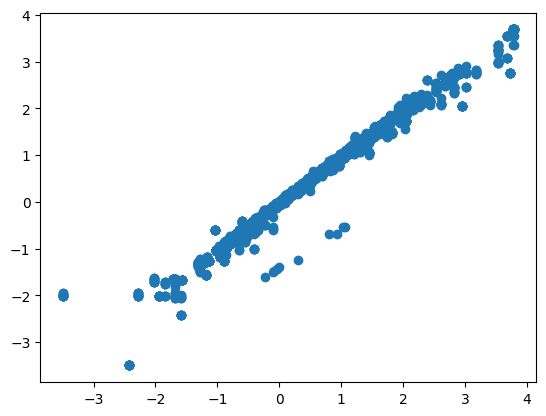

In [62]:
plt.plot(test_y, pred, 'o')

Very linear => prediction matches true values for most cases

Lets actually look at the predicted and true values

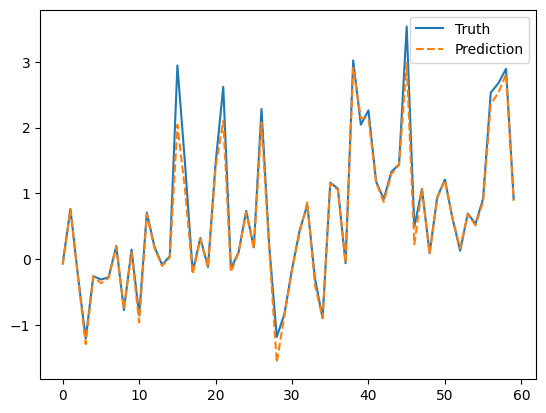

In [63]:
gap = 100
plt.plot(test_y[::gap], label='Truth')
plt.plot(pred[::gap], label='Prediction', ls='--')
plt.legend()

In [64]:
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test_y[::gap], pred[::gap])), 3)}')

RMSE: 0.181


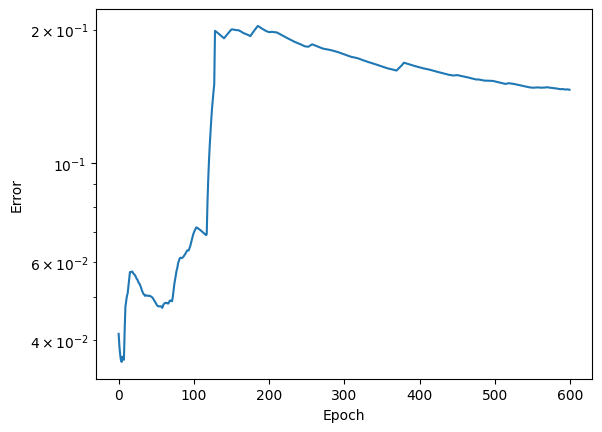

In [65]:
plt.plot(errs)
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

Let's look at the residuals

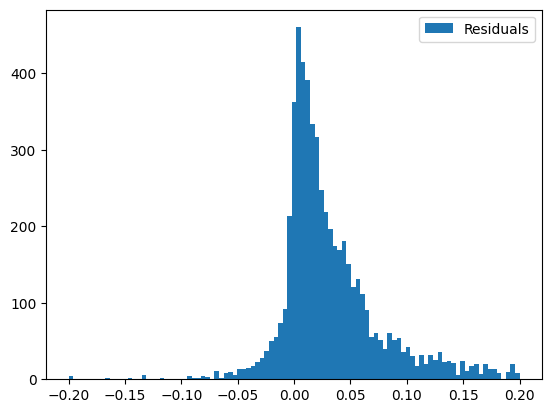

In [66]:
plt.hist(np.array(test_y)-np.array(pred),
         bins=np.linspace(-0.2, 0.2, 100), 
         label='Residuals')
plt.legend()

Overall things look good. There are a few points with high differences indicating we could do a bit better with training/cleaning.
The asymmetric tails (the positive tail is larger) mean the model tends to **underpredict** the temperature.

Let's plot without the outliers (i.e. remove the points with high residuals)

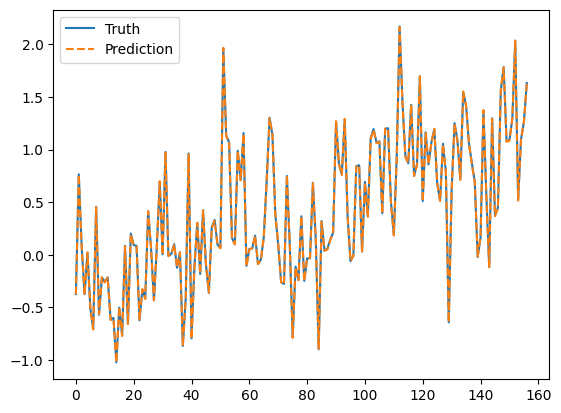

In [67]:
gap = 10
x = np.array(test_y[::gap])
y = np.array(pred[::gap])
well_trained = np.abs(x - y) < 0.01
plt.plot(x[well_trained], label='Truth')
plt.plot(y[well_trained], label='Prediction', ls='--')
plt.legend()

In [68]:
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test_y[::gap], pred[::gap])), 3)}')

RMSE: 0.149


These points predict the true tempurature change well, but this isn't the best way to remove outlies. For now, let's continue with the full dataset.

# Part III: XG(PU)Boost

In [69]:
def xgb_predict(X, y, val, n_estimators=100):
    reg = xgb.XGBRegressor(device="cuda", tree_method="hist", n_estimators=n_estimators)
    #print(f'Training on {X=}, {val=}')
    reg.fit(X, y.ravel())
    pred = reg.predict(val)
    return pred

In [70]:
y_test.describe()

count    231.000000
mean       0.980619
std        0.913435
min       -1.040000
25%        0.391500
50%        0.882000
75%        1.426000
max        3.788000
Name: temp, dtype: float64

In [71]:
def validate(data, window, n_tests, n_estimators=100):
    predictions = []
    history = []
    errors = []

    for i in range(len(data.values) - window - n_tests + 1):
        train_X, train_y = data.drop(columns='temp').iloc[i:i+window].values, data[['temp']].iloc[i:i+window].values
        test_X, test_y = data.drop(columns='temp').iloc[i+window:i+window+n_tests].values, data[['temp']].iloc[i+window:i+window+n_tests].values
        pred = xgb_predict(train_X, train_y, test_X, n_estimators=n_estimators)
        predictions.extend(pred)
        history.extend(test_y.reshape((1,-1))[0])
        err = mean_squared_error(history, predictions, squared=False)
        errors.append(err)

    err = mean_squared_error(history, predictions, squared=False)
    return err, errors, history, predictions

In [72]:
err, errs, test_y, pred = validate(us, 
                                   window=90, 
                                   n_tests=10, 
                                   n_estimators=100)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [20:38:45] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


errs, test_y, pred, reg = validate(X_train, y_test, X_test, window=1, n_tests=1, n_estimators=10)

In [73]:
print(test_y[:10], pred[:10])

[-0.062, -0.374, -0.538, 0.107, -0.187, -1.715, -0.487, -0.438, -1.689, 1.149] [-0.08367105, -0.37158912, -0.56259966, 0.048366465, -0.19661355, -1.6524982, -0.49229228, -0.47167653, -1.6450517, 1.0749477]


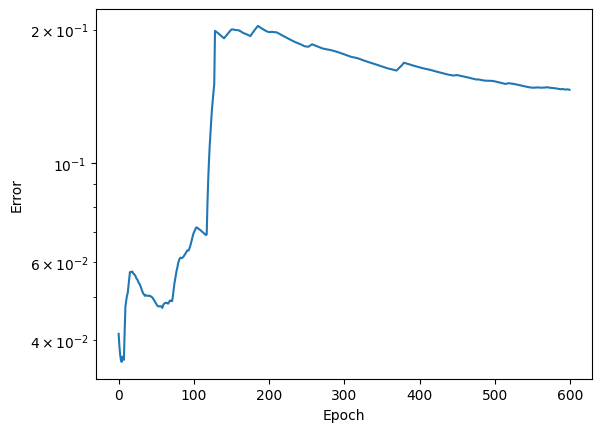

In [74]:
plt.plot(errs)
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

The error is ok

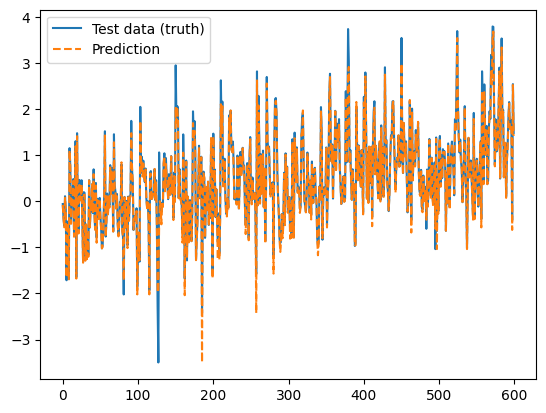

In [75]:
gap = 10
plt.plot(test_y[::gap], label='Test data (truth)')
plt.plot(pred[::gap], ls='--', label='Prediction')
plt.legend()
plt.show()

In [76]:
X_train.describe()

,Months,year,temp_prev0,temp_prev1,temp_prev2,temp_prev3,temp_prev4,temp_prev5,temp_prev6,temp_prev7,temp_prev8,temp_prev9
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,6.500000,1980.000000,0.177220,0.178462,0.183840,0.188897,0.193301,0.196417,0.196746,0.197479,0.198551,0.199966
std,3.455747,11.266672,0.894285,0.895753,0.909441,0.918608,0.916826,0.917460,0.917538,0.917267,0.917552,0.917034
min,1.000000,1961.000000,-3.498000,-3.498000,-3.498000,-3.498000,-3.498000,-3.498000,-3.498000,-3.498000,-3.498000,-3.498000
25%,3.750000,1970.000000,-0.367250,-0.367250,-0.367250,-0.367250,-0.364000,-0.364000,-0.364000,-0.364000,-0.364000,-0.349500
50%,6.500000,1980.000000,0.089000,0.089000,0.089000,0.089000,0.090000,0.091000,0.091000,0.091000,0.091000,0.092500
75%,9.250000,1990.000000,0.699000,0.699000,0.699000,0.703500,0.708250,0.712500,0.712500,0.712500,0.712500,0.712500
max,12.000000,1999.000000,2.946000,2.946000,3.732000,3.732000,3.732000,3.732000,3.732000,3.732000,3.732000,3.732000


In [77]:
X_test.describe()

,Months,year,temp_prev0,temp_prev1,temp_prev2,temp_prev3,temp_prev4,temp_prev5,temp_prev6,temp_prev7,temp_prev8,temp_prev9
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,6.441558,2009.129870,0.980619,0.980130,0.965303,0.955147,0.955987,0.955589,0.962203,0.960909,0.960139,0.967900
std,3.475980,5.570147,0.913435,0.913173,0.895940,0.885752,0.885745,0.885696,0.887929,0.889511,0.889822,0.890938
min,1.000000,2000.000000,-1.040000,-1.040000,-1.040000,-1.040000,-1.040000,-1.040000,-1.040000,-1.040000,-1.040000,-1.040000
25%,3.000000,2004.000000,0.391500,0.391500,0.382000,0.382000,0.382000,0.382000,0.382000,0.382000,0.382000,0.391500
50%,6.000000,2009.000000,0.882000,0.882000,0.877000,0.870000,0.877000,0.877000,0.882000,0.882000,0.882000,0.916000
75%,9.000000,2014.000000,1.426000,1.424500,1.419000,1.414000,1.414000,1.414000,1.419000,1.419000,1.419000,1.424500
max,12.000000,2019.000000,3.788000,3.788000,3.788000,3.788000,3.788000,3.788000,3.788000,3.788000,3.788000,3.788000


In [78]:
pred = reg.predict(X_test)

In [79]:
#print(f'RMSE: {np.round(np.sqrt(mean_squared_error(test_y, pred)), 3)}')

## Predicting the future

In [80]:
n_prev = 100

# Drop any existing temp_prev columns
us = us.drop(columns=[col for col in us.columns if col.startswith('temp_prev')])

# Then recreate them using pd.concat
shifted_cols = {
    f'temp_prev{i}': us['temp'].shift(-1 * i)
    for i in range(n_prev)
}
us = pd.concat([us, pd.DataFrame(shifted_cols)], axis=1)
us = us.dropna()

In [81]:
train, test = train_test_split(us, 2000)#(7001, 2000))#('January', '2000'))
X_train, y_train = create_features(train, 'temp')
X_test, y_test = create_features(test, 'temp')

In [82]:
reg = xgb.XGBRegressor(device="cuda", tree_method="hist", n_estimators=1000)
reg = reg.fit(X_train, y_train)

In [83]:
def predict_n_steps_ahead(reg, last_known_values, n_steps=10):
    """
    reg: trained XGBoost model
    last_known_values: np.array of shape (100,) - most recent 100 temps
    n_steps: how many days to predict
    """
    preds = []
    window = last_known_values.to_numpy()
    month = window[0][0]
    year  = window[0][1]
    print(month, year)

    for n in range(n_steps):
        #print(n, window)
        X_input = np.array(window[-n_steps:]).reshape(1, -1)
        pred = reg.predict(X_input)[-1]
        preds.append(pred)
        next_month = month + 1
        next_year = year
        if next_month > 20:
            next_year += 1
            next_month = next_month % 20
        window[0][0] = next_month
        window[0][1] = next_year
        for i in range(n_prev-2):
            window[0][i+2] = window[0][i+3]
        window[0][-1] = pred

    display(last_known_values.head())

    return preds

In [84]:
future = pd.DataFrame({'Months': [0], 'year': [2020], 'temp': [0]})
display(future.head())
for i in range(1, n_prev):
    future[f'temp_prev{i}'] = us.iloc[-i]['temp']
display(future.tail())

,Months,year,temp
0,0,2020,0


,Months,year,temp,temp_prev1,temp_prev2,temp_prev3,temp_prev4,temp_prev5,temp_prev6,temp_prev7,...,temp_prev90,temp_prev91,temp_prev92,temp_prev93,temp_prev94,temp_prev95,temp_prev96,temp_prev97,temp_prev98,temp_prev99
0,0,2020,0,-0.643,0.788,1.085,1.055,1.127,0.501,1.001,...,0.916,0.077,0.503,0.877,1.203,0.66,2.166,1.932,1.198,-0.342


In [85]:
# Last row of X_test should have shape (100,)
last_known = X_train.iloc[-n_prev].values  # Or use recent values directly
n_prev=100
forecast_n_months = predict_n_steps_ahead(reg, future, n_steps=n_prev)
print(f"{n_prev}-month forecast:", forecast_n_months)

0.0 2020.0


,Months,year,temp,temp_prev1,temp_prev2,temp_prev3,temp_prev4,temp_prev5,temp_prev6,temp_prev7,...,temp_prev90,temp_prev91,temp_prev92,temp_prev93,temp_prev94,temp_prev95,temp_prev96,temp_prev97,temp_prev98,temp_prev99
0,0,2020,0,-0.643,0.788,1.085,1.055,1.127,0.501,1.001,...,0.916,0.077,0.503,0.877,1.203,0.66,2.166,1.932,1.198,-0.342


100-month forecast: [0.010701001, -0.643447, 0.8034473, 1.0965397, 1.0580648, 1.1299088, 0.4962327, 0.98234713, 0.3250032, 1.3744041, 1.1519045, -0.21807791, 0.50002754, -0.6374045, 1.3851296, -1.226215, 0.81704867, -0.043435812, -0.041159555, 0.14265938, 0.9401728, 0.10582947, 0.6612173, 1.3667353, 0.4215681, -0.10535224, 0.6968339, -0.62841874, 0.30336225, 0.017924815, 0.09064383, 0.5486166, -0.16980083, -0.16193323, 0.6660087, 0.15553795, 0.20042934, 0.6129494, 1.7298726, 1.1764812, 1.0492868, 1.483792, 0.7688057, 0.83881134, 1.094704, 0.44908714, 1.9472669, -0.3905155, 1.1593193, 2.0792701, 0.499147, -0.038182825, -0.24160509, 0.49447733, 1.2636409, 1.0438001, 1.142975, 1.6636435, 0.6003549, 1.2845584, 2.8366046, 0.8484703, 0.8081722, 0.7582682, 1.375062, 0.869793, 0.9460497, 0.70405924, 0.30411595, 0.7693347, 1.4069593, 2.0691564, 2.0376801, 1.4057372, 1.4063551, 0.9464977, 0.18421406, -0.21405165, 0.1830002, 0.45054853, 1.2850655, 1.2796663, 2.774772, 0.48746222, 0.10665726, 1.16

672 672 772


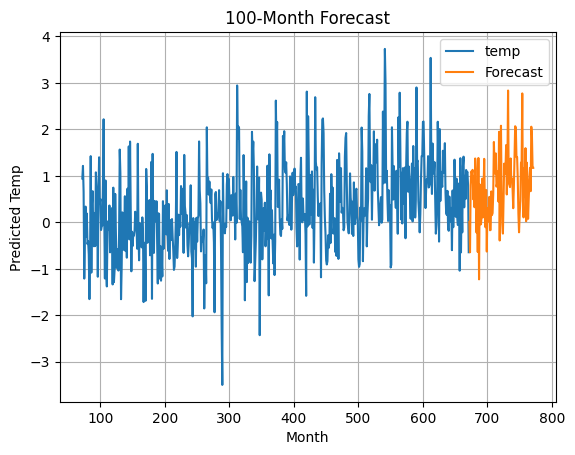

In [86]:
us[['Months', 'year', 'temp']].plot(y='temp', use_index=True)
offset = len(us[['Months', 'year', 'temp']]) + us.index[0]
print(offset, offset, offset+n_prev)
plt.plot(range(offset, offset+n_prev), forecast_n_months, label='Forecast')
#plt.plot(range(n_prev), y_train[-n_prev:])
plt.title(f"{n_prev}-Month Forecast")
plt.xlabel("Month")
plt.ylabel("Predicted Temp")
#plt.xlim(offset-n_prev**2, offset+n_prev)
plt.grid(True)
plt.legend()
plt.show()